In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import keras
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

np.random.seed(0)

In [38]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


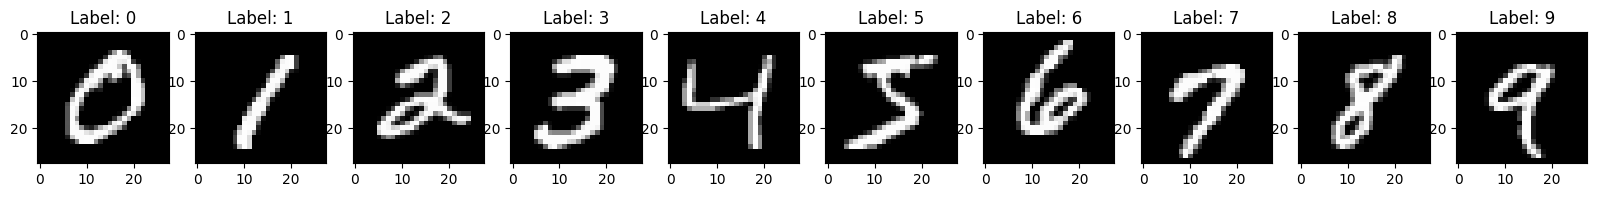

In [19]:
numbers = 10
fig, ax = plt.subplots(1, numbers, figsize=(20, 5))

for i in range(numbers):
    sample = x_train[y_train == i][0]
    ax[i].imshow(sample, cmap="gray")
    ax[i].set_title(y_train[i])
    ax[i].set_title("Label: {}".format(i))

In [33]:
for i in range(10):
    print(y_train[i])

5
0
4
1
9
2
1
3
1
4


In [39]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
for i in range(10):
    print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [40]:
# Normalize the data
x_train = x_train / 255
x_test = x_test / 255

In [41]:
# Reshape the data
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

In [42]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 784) (60000, 10)
(10000, 784) (10000, 10)


In [47]:
model = Sequential(
    [
        Dense(128, activation="relu", input_shape=(784,)),
        Dense(64, activation="relu"),
        Dropout(0.25),
        Dense(10, activation="softmax"),
    ]
)
model.compile(optimizer=Adam(), loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
model.fit(x_train, y_train, batch_size=128, epochs=20, verbose=1)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9908 - loss: 0.0303
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9914 - loss: 0.0270
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9912 - loss: 0.0247
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9926 - loss: 0.0212
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9929 - loss: 0.0214
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9941 - loss: 0.0180
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9949 - loss: 0.0162
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9948 - loss: 0.0160
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9950 - loss: 0.0150
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9962 - loss: 0.0124
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9952 - loss: 0.0147
Epoch 12/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

In [51]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy: ", test_acc)
print("Test loss: ", test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step - accuracy: 0.9774 - loss: 0.0960
Test accuracy:  0.9807999730110168
Test loss:  0.0882396474480629


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step


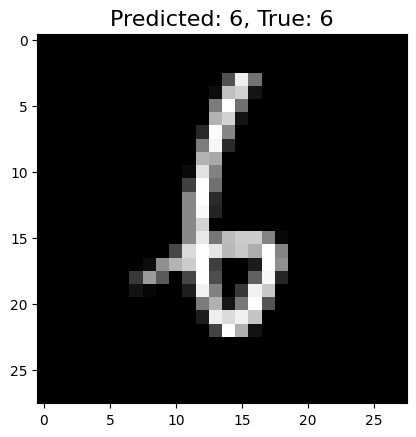

In [54]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]
y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title(
    "Predicted: {}, True: {}".format(y_sample_pred_class, y_sample_true), fontsize=16
)
plt.imshow(x_sample.reshape(28, 28), cmap="gray")

Text(0.5, 1.0, 'Confusion Matrix')

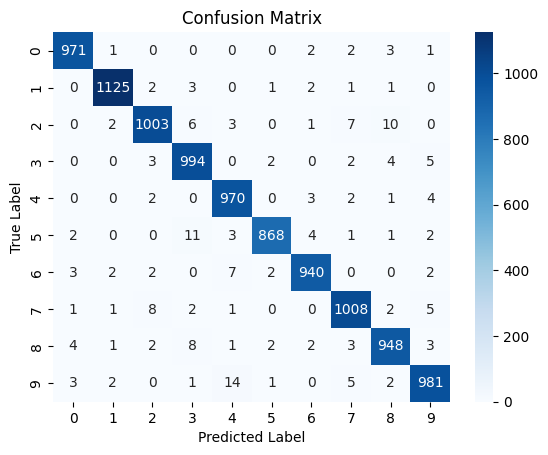

In [61]:
confusion_mtx = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(confusion_mtx, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

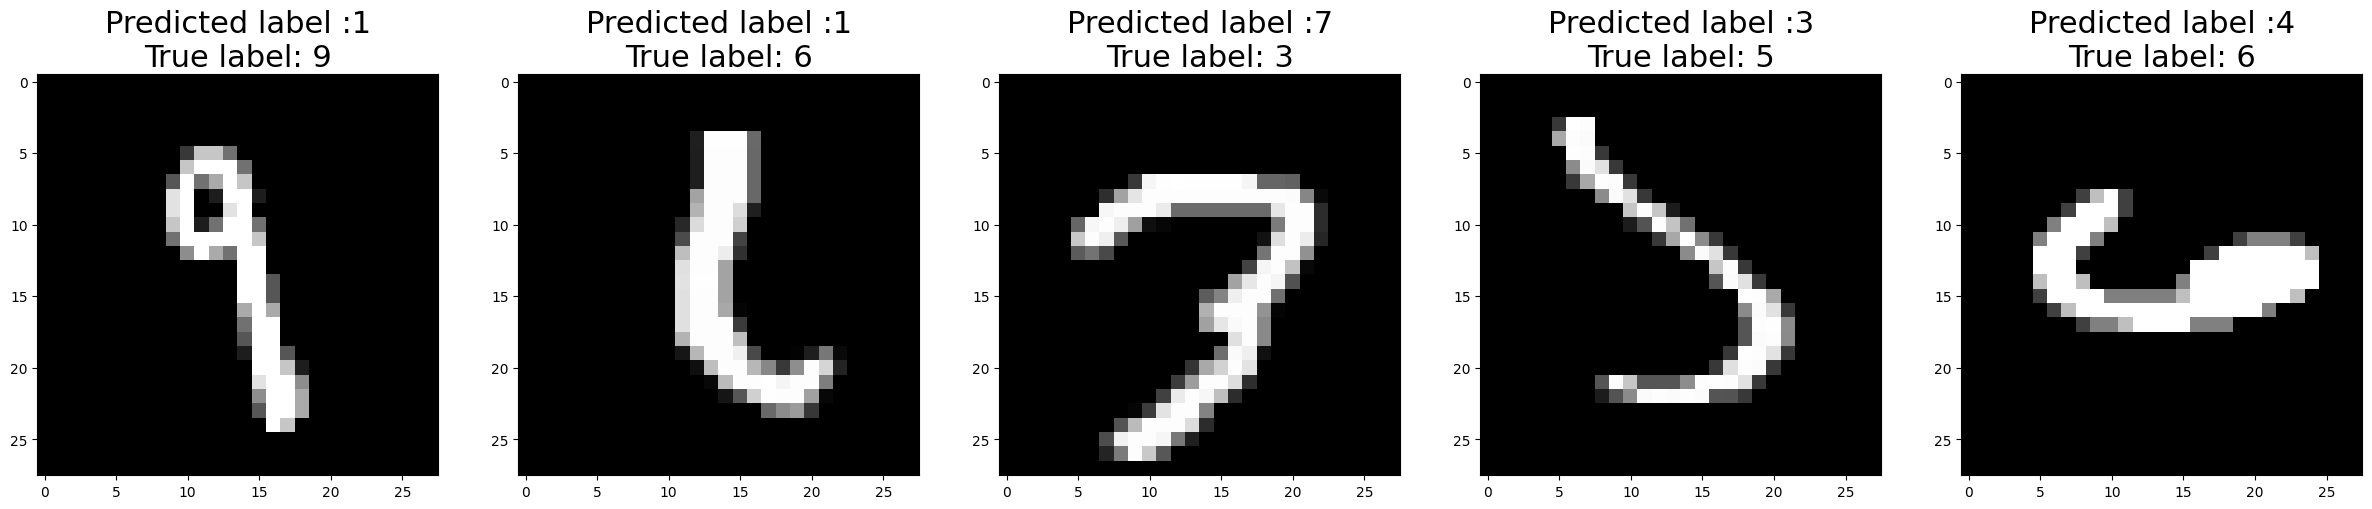

In [62]:
errors = y_pred_classes - y_true != 0
y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
x_test_errors = x_test[errors]
y_pred_errors_probability = np.max(y_pred_errors, axis=1)
true_probability_errors = np.diagonal(np.take(y_pred_errors, y_true_errors, axis=1))
diff_errors_pred_true = y_pred_errors_probability - true_probability_errors

# Get list of indices of sorted differences
sorted_idx_diff_errors = np.argsort(diff_errors_pred_true)
top_idx_diff_errors = sorted_idx_diff_errors[-5:]  # 5 last ones
# Show Top Errors
num = len(top_idx_diff_errors)
f, ax = plt.subplots(1, num, figsize=(30, 30))

for i in range(0, num):
    idx = top_idx_diff_errors[i]
    sample = x_test_errors[idx].reshape(28, 28)
    y_t = y_true_errors[idx]
    y_p = y_pred_classes_errors[idx]
    ax[i].imshow(sample, cmap="gray")
    ax[i].set_title("Predicted label :{}\nTrue label: {}".format(y_p, y_t), fontsize=22)